# Data Projection
数据投影是指将数据从高维空间投影到低维空间的过程。在机器学习中，数据投影是一种常见的数据预处理方法，它可以用于数据可视化、特征选择、降维等应用场景。在这个notebook中，我们将介绍PCA, t-SNE, Fisher's Linear Discriminant(LDA)等数据投影方法，并通过实例演示如何使用这些方法进行数据投影。

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [10]:
# load iris dataset
iris = load_iris()
X = iris.data # [150, 4]
y = iris.target # [150,]
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

# 1. PCA: Principal Component Analysis
## 1. PCA model
PCA是一种常见的数据降维方法,属于无监督学习的一种。它通过线性变换将原始数据投影到低维空间。PCA的基本思想是将高维数据投影到一个低维空间，使得投影后的数据尽可能保留原始数据的信息。PCA通过找到数据中方差最大的方向，然后将数据投影到这些方向上，以此来降低数据的维度。这些方向称为主成分，是数据集中变异性最大的方向。

由于pca对度量尺度敏感，因此在应用pca之前，通常需要对数据进行标准化处理。

使用iris数据集，其中包含4个特征，我们将使用PCA将数据投影到2维空间，以便可视化。

In [38]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

## 2. Loading Matrix & Explained Variance
### Loading Matrix
Loading Matrix是PCA模型的一个重要属性，它是一个矩阵，用于将原始特征投影到主成分空间。每一行表示一个主成分，每一列表示一个原始特征。通过载荷矩阵，你可以理解每个主成分反映了原始特征空间的哪些方向。例如，如果某个特征在某个主成分上的载荷很高，那么这个主成分在很大程度上反映了该特征的变异。载荷的正负号还可以帮助你了解特征之间的关系，如同向载荷表示特征在该成分上同向变化，反之亦然。

在PCA中，每个主成分都是原始数据特征的加权线性组合，这些权重（或系数）就构成了载荷矩阵。如果我们假设有四个特征（feature1, feature2, feature3, feature4），那么第一个主成分（PC1）可以表示为：

$$\[ \text{PC1} = 0.361387 \times \text{feature1} - 0.084523 \times \text{feature2} + 0.856671 \times \text{feature3} + 0.358289 \times \text{feature4} \]$$

这个表达式反映了每个特征对第一个主成分的贡献。系数的大小表示了对应特征在构成该主成分时的相对重要性，而系数的正负号则表示该特征与主成分的相关方向。在这个例子中，feature3对PC1的贡献最大，这意味着PC1在很大程度上捕捉了feature3的变异。

在PCA模型中，Loading Matrix即为模型的`components_`属性。

---

### Explained Variance
Explained Variance是PCA模型的另一个重要属性，它表示每个主成分解释的方差比例。在PCA中，主成分是按照方差大小排序的，因此Explained Variance也可以理解为每个主成分的重要性。

示例中pca1的explained variance为0.9246，表示第一个主成分解释了92.46%的方差。这意味着，如果我们只保留第一个主成分，那么我们就可以保留92.46%的数据信息。通常，我们会根据Explained Variance来选择保留的主成分数量。

在PCA模型中，Explained Variance即为模型的`explained_variance_ratio_`属性。

In [39]:
# loading matrix
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [40]:
# explained variance
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

## 3. Visualization
对于数据投影或降维的方式，我们的目的都是使用这样的算法将高维数据降维到2或3维，以便可视化。在这个示例中，我们使用PCA将iris数据投影到2维空间，并使用散点图进行可视化。

PCA图：通过PCA，数据被投影到了两个主要成分上，这两个成分捕获了数据的最大方差。虽然不同类别的数据有一定程度的分离，但仍有一些重叠。这是因为PCA是一种无监督学习方法，它只关注数据的方差，而不关注数据的类别。因此，PCA在数据可视化时可能无法很好地区分不同类别的数据。

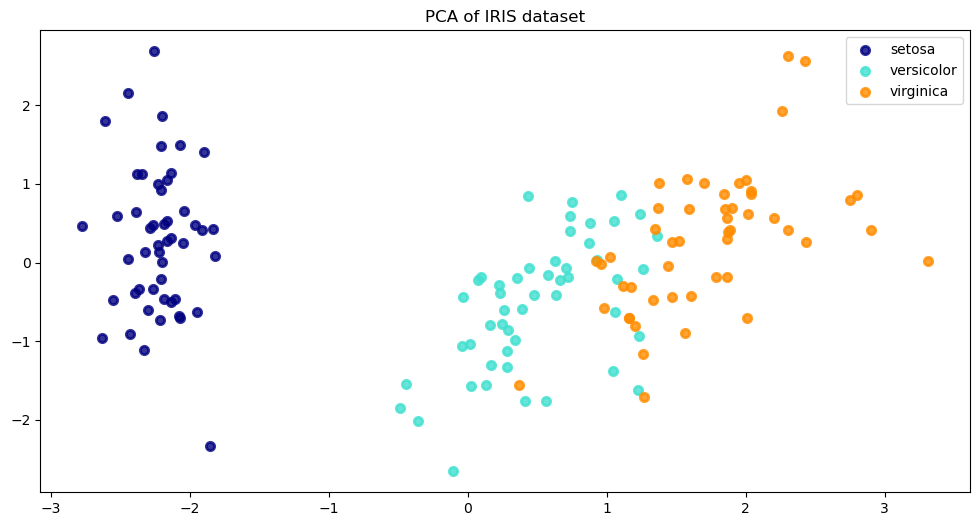

In [41]:
# visualization
plt.figure(figsize=(12, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
pca_plt=plt
pca_plt.show()

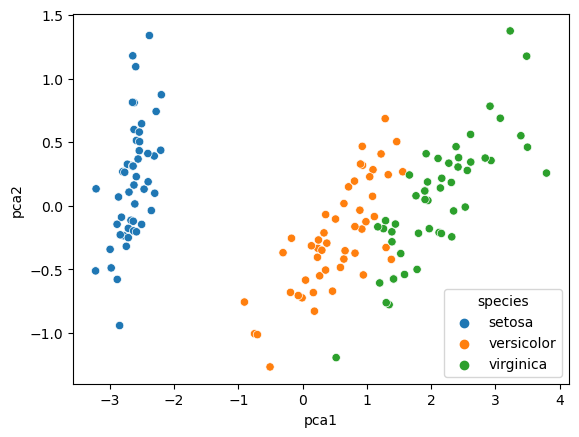

In [22]:
# 使用x=pca1, y=pca2, hue=species绘制散点图
df = pd.DataFrame(X_pca, columns=['pca1', 'pca2'])
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

sns.scatterplot(x='pca1', y='pca2', hue='species', data=df)
plt.show()

# 2. LDA: Linear Discriminant Analysis
线性判别分析（Linear Discriminant Analysis，LDA）是一种监着学习的统计方法，用于降维和分类。其基本原理是寻找一种线性组合方式，通过这种方式将高维的数据投影到较低维的空间中，同时使得投影后的数据在类间有最大的分离度和类内有最小的分散度，从而达到良好的分类效果。

LDA旨在最大化类间差异并最小化类内差异。由于LDA考虑了类别标签，并且是基于类别间和类别内的统计分布，所以相对于PCA，LDA对数据的尺度不那么敏感。然而，如果数据集中的特征量纲差异很大，标准化仍然可能有助于提高模型性能和稳定性。



## 2.1 基本原理

LDA的目标可以分为两个方面：
1. **最大化类间散度**：使得不同类别的数据在投影后尽可能地远离彼此。
2. **最小化类内散度**：使得同一类别的数据在投影后尽可能地靠近彼此。

数学上，LDA通过优化以下准则函数来实现这个目标：

$$\[ J(\mathbf{w}) = \frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}} \]$$

其中，$\(\mathbf{w}\)$是投影向量，$\(S_B\)$是类间散度矩阵，$\(S_W\)$是类内散度矩阵。优化这个函数意味着我们寻找一个方向$\(\mathbf{w}\)$，在这个方向上，类间散度最大化而类内散度最小化。

### Compared with PCA
适用情况：由于PCA不利用类别信息，因此它更适合于探索性数据分析和去噪等任务。而LDA由于利用了类别信息，更适合于分类任务。
简而言之，尽管PCA和LDA都是通过找到数据的一个有效低维表示来实现降维，但它们的核心区别在于PCA关注于保留数据的总体结构（即方差），而LDA关注于最大化类别可分性。这导致它们在不同类型的任务中各有优势。

## Visualization
LDA考虑了数据的类别标签，目的是最大化不同类别数据的可分性。从图中可以明显看出，不同类别的数据在LDA处理后被更好地分离。

In [24]:
lda= LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y) # LDA是监督学习，需要输入标签
X_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

In [25]:
# explained variance
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

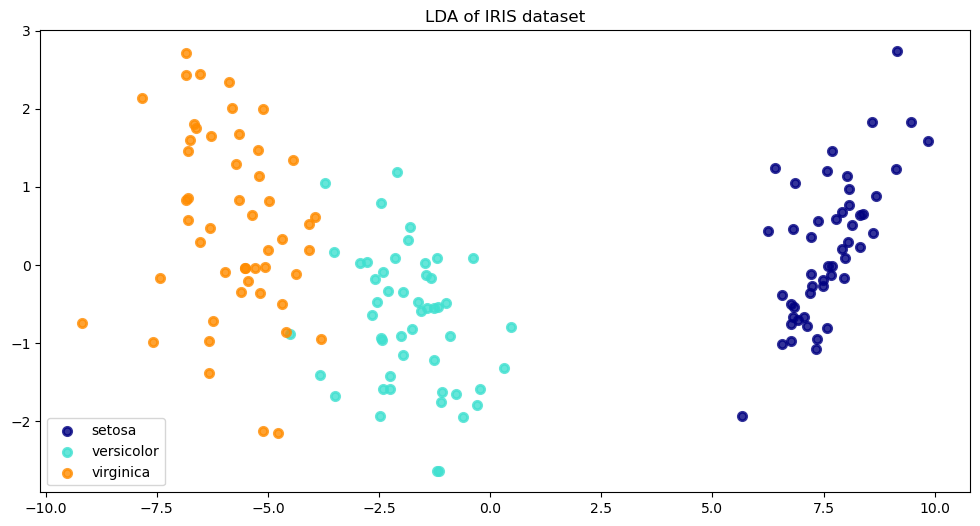

In [27]:
# visualization
plt.figure(figsize=(12, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()

# 3. t-SNE: t-distributed Stochastic Neighbor Embedding
t-SNE是一种非线性降维算法，属于无监督学习。它可以将高维数据投影到低维空间，以便可视化。t-SNE的基本思想是将高维空间中的数据点映射到低维空间中，使得原始空间中距离较近的数据点在映射后的低维空间中仍然保持较近的距离，而原始空间中距离较远的数据点在映射后的低维空间中保持较远的距离。

t-SNE主要关注于保持高维空间中数据点之间的相对距离（即，相似性）在低维空间的表示。尽管t-SNE对数据的尺度不像PCA那样敏感，但在某些情况下，如果数据的特征具有非常不同的量纲和数值范围，进行标准化可能有助于改善嵌入的质量和算法的稳定性。

## 3.1 基本原理

t-SNE（t-Distributed Stochastic Neighbor Embedding）是一种非常有效的高维数据可视化技术。它主要用于降维，特别是将高维数据集降至二维或三维以进行可视化。t-SNE的核心思想是在高维和低维空间中保持数据点之间的相似性。

t-SNE的步骤大致如下：

1. **计算高维空间中的相似性**：对于高维空间中的每对数据点，t-SNE首先计算它们之间的条件概率，这个概率反映了一个点选另一个点作为其邻居的可能性。这个概率与两点之间的距离有关，距离越近，概率越高。

2. **计算低维空间中的相似性**：t-SNE随机初始化每个点在低维空间中的位置，然后计算低维空间中每对点的相似性（也是用条件概率表示）。

3. **最小化相似性的KL散度**：t-SNE通过梯度下降最小化高维和低维空间中相似性分布之间的Kullback-Leibler（KL）散度。这一步的目的是调整低维空间中的点位置，使得低维空间的相似性尽可能接近高维空间的相似性。

4. **优化和可视化**：经过多次迭代后，低维空间的点位置逐渐稳定下来，此时低维空间中的点位置可以用于可视化。

## 3.2 优化策略
由于TSNE需要计算高维空间的所有数据点对之间的相似性，因此计算复杂度较高。为了提高效率，t-SNE通常会先使用PCA对数据进行降维，然后再使用t-SNE对降维后的数据进行降维。这样做的好处是，PCA可以帮助t-SNE找到更好的初始点位置，从而加速t-SNE的收敛速度。

另外，也可以通过设置不同的超参数来调整t-SNE的性能。
在`sklearn`的t-SNE实现中，有几个参数可以帮助你优化算法的执行，尽管直接的优化策略（如使用树结构进行最近邻搜索）是内置的，不需要用户手动设置。但是，可以通过调整这些参数来加速t-SNE的运行时间或提高结果的质量：

1. **`n_iter`**：这是算法运行的迭代次数。虽然更多的迭代可能会导致更准确的嵌入结果，但也会相应地增加计算时间。默认值通常足够大，以确保算法收敛，但如果你正在处理非常大的数据集并且希望减少运行时间，可以尝试减少迭代次数。

2. **`n_iter_without_progress`**：这个参数设置了在停止优化前，如果没有进展（即，优化的成本没有显著下降），算法可以运行的最大迭代次数。减少这个值可以在没有明显进步时更早地停止算法，从而节省时间。

3. **`perplexity`**：这个参数与条件概率的计算密切相关，影响到局部邻域的大小。虽然它不直接影响计算速度，但选择合适的`perplexity`值可以改善结果的质量和稳定性，间接影响到优化的效率。`perplexity`的一个好的起始点是30，对于较大的数据集，可能需要尝试更大的值。

4. **`early_exaggeration`**：在优化的早期阶段，t-SNE会放大特征之间的距离，以帮助空间布局的形成。调整这个参数可能会影响算法的运行速度和结果的质量。增加`early_exaggeration`的值可能会让算法更容易找到一个更好的全局结构，但也可能需要更多的迭代次数。

5. **`learning_rate`**：学习率对优化过程至关重要。太高或太低的学习率都可能导致结果不理想或者算法收敛得很慢。通常，学习率在200到1000之间效果较好。

6. **`method`**：对于大规模数据集，`method='barnes_hut'`是一个好的选择，因为它使用了Barnes-Hut近似来加速邻居搜索和梯度计算。对于非常大的数据集，可以尝试`method='exact'`以外的方法以获得更好的性能。




In [36]:
# t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)
X_tsne

array([[-23.875437  ,  -1.4305894 ],
       [-21.332832  ,  -2.5229647 ],
       [-21.183956  ,  -1.3164853 ],
       [-20.842545  ,  -1.61192   ],
       [-23.845785  ,  -0.9457335 ],
       [-25.833662  ,  -0.9249592 ],
       [-21.434713  ,  -0.7261155 ],
       [-23.135448  ,  -1.5997264 ],
       [-20.077644  ,  -1.7236085 ],
       [-21.728899  ,  -2.2258704 ],
       [-25.438894  ,  -1.6185867 ],
       [-22.392347  ,  -1.1686792 ],
       [-20.983025  ,  -2.2591443 ],
       [-19.860811  ,  -1.1332073 ],
       [-26.776562  ,  -1.5117849 ],
       [-26.88732   ,  -0.9376887 ],
       [-26.012383  ,  -1.2746142 ],
       [-23.93844   ,  -1.5569798 ],
       [-26.26575   ,  -1.8069136 ],
       [-24.88065   ,  -0.82918686],
       [-24.896988  ,  -2.4844184 ],
       [-24.62376   ,  -1.0674903 ],
       [-21.465752  ,   0.10849005],
       [-23.518333  ,  -2.8430624 ],
       [-22.436312  ,  -0.6163109 ],
       [-21.753988  ,  -2.7942991 ],
       [-23.376272  ,  -2.279838  ],
 

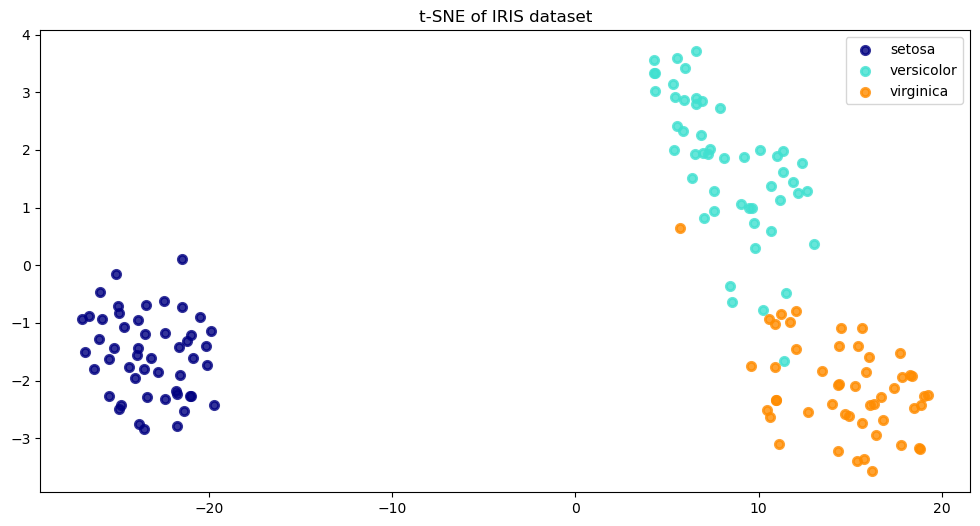

In [44]:
# visualization
plt.figure(figsize=(12, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE of IRIS dataset')
plt.show()

# 4. More Data Projection Methods

除了PCA、LDA和t-SNE，还有其他一些数据投影方法，包括线性和非线性方法：

### 线性方法
- **多维缩放（MDS）**：旨在在低维空间中保持数据点间的距离，尽可能与高维空间中的距离相似。
- **因子分析（FA）**：假定观测变量由潜在的几个因子和特定的误差项构成，通过数据中变量间的相关性来寻找这些潜在因子。

### 非线性方法
- **自组织映射（SOM）**：是一种人工神经网络，用于将高维数据投影到通常为二维的低维空间中，同时保持数据的拓扑结构。
- **局部线性嵌入（LLE）**：通过保持数据点之间的局部线性关系来降维，试图在低维空间中保留高维空间中邻居间的距离。
- **等度量映射（Isomap）**：一种流形学习方法，旨在保持数据点之间的测地距离，结合了经典MDS的全局视角和LLE的局部视角。

### Python中的实现
大多数这些方法都可以在`sklearn`库中找到实现，例如：

```python
from sklearn.manifold import MDS, TSNE, Isomap
from sklearn.decomposition import FactorAnalysis
from sklearn.neighbors import LocalLinearEmbedding

# 示例：使用MDS
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)  # X是原始数据

# 示例：使用Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)
```

选择哪种降维技术取决于具体的数据特性和分析目标。线性方法通常计算效率更高，适合于数据结构简单或者是线性分布的情况。而非线性方法虽然计算成本更高，但能更好地处理复杂的数据结构，尤其是当数据嵌入在低维流形中时。